In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx
G = networkx.read_edgelist('drive/MyDrive/facebook/0.edges')

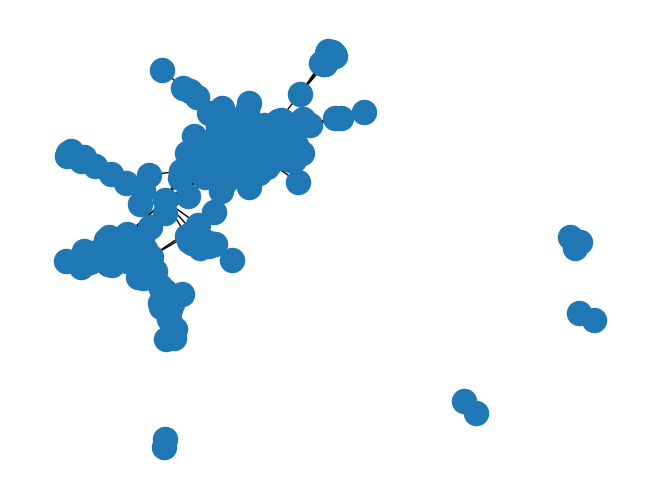

In [ ]:
networkx.draw(G)

In [ ]:
largest_cc = max(networkx.connected_components(G), key=len)
S = networkx.Graph(G.subgraph(largest_cc))


n = len(S.nodes())
isIsolate = True
while True:
  isIsolate = False
  for node in S.nodes():
    deg = S.degree(node)
    if deg < 10:
      S.remove_node(node)
      isIsolate = True
      break
  if not isIsolate:
    break


while True:
  cutset = networkx.minimum_edge_cut(S)
  print(cutset, S.number_of_nodes())
  if len(cutset) > 10:
    break
  S.remove_edges_from(cutset)
  largest_cc = max(networkx.connected_components(S), key=len)
  S = networkx.Graph(S.subgraph(largest_cc))



{('122', '45'), ('104', '45'), ('186', '45'), ('132', '45'), ('142', '45'), ('303', '45'), ('345', '45'), ('322', '45'), ('67', '45'), ('200', '45')} 136
{('284', '127'), ('108', '127'), ('346', '127'), ('197', '127'), ('21', '127'), ('184', '127'), ('281', '127'), ('159', '127'), ('320', '127'), ('272', '127')} 135
{('184', '197'), ('320', '197'), ('159', '197'), ('284', '197'), ('272', '197'), ('281', '197'), ('108', '197'), ('21', '197'), ('329', '197')} 134
{('108', '281'), ('108', '284'), ('108', '21'), ('108', '320'), ('108', '184'), ('108', '159'), ('108', '57'), ('108', '272')} 133
{('284', '320'), ('284', '159'), ('284', '184'), ('284', '122'), ('284', '329'), ('284', '281'), ('284', '21')} 132
{('281', '320'), ('281', '159'), ('281', '184'), ('281', '122'), ('281', '272'), ('281', '21')} 131
{('159', '184'), ('320', '184'), ('272', '184'), ('346', '184'), ('21', '184'), ('329', '184'), ('57', '184')} 130
{('159', '172'), ('159', '320'), ('159', '345'), ('159', '277'), ('159',

In [ ]:
len(networkx.minimum_edge_cut(S))

#largest_cc = max(networkx.connected_components(G), key=len)
#S = networkx.Graph(G.subgraph(largest_cc))

11

120 1598


71

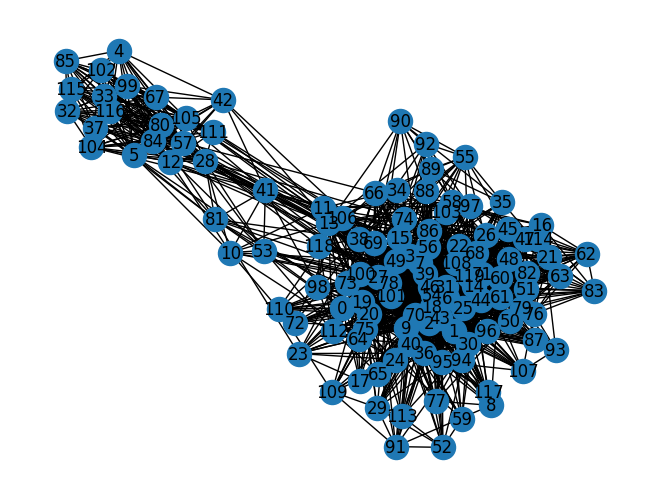

In [ ]:
S = networkx.convert_node_labels_to_integers(S)
networkx.draw(S,with_labels = True)
print(S.number_of_nodes(), S.number_of_edges())

degree = []
for node in S:
  degree.append(S.degree(node))
max(degree)

In [ ]:
!pip3 install scipy==1.9.0
import scipy
print(scipy.__version__)

1.9.0


In [ ]:
M = networkx.laplacian_matrix(S)

In [ ]:
import scipy.sparse.linalg
M = M.asfptype()
u, V = scipy.sparse.linalg.eigs(M,3,which='SM')
eigVec = V[:,1]
u


array([8.88178420e-16+0.j, 1.75687816e+00+0.j, 8.23873905e+00+0.j])

In [ ]:
dictionary = {}
reLabel = {}
for i in range(eigVec.size):
  dictionary[i] = float(eigVec[i])
sortedDict = sorted(dictionary.items(), key=lambda item: item[1])
for i in range(eigVec.size):
  reLabel[sortedDict[i][0]] = i

<ipython-input-50-e301eed1058b>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  dictionary[i] = float(eigVec[i])


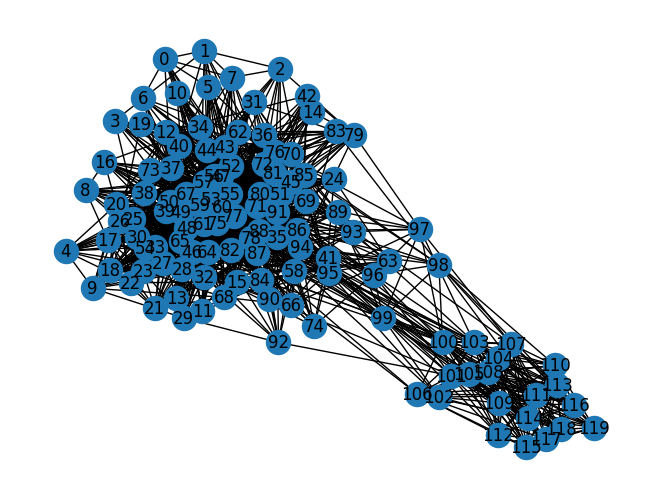

In [ ]:
reLabelS = networkx.relabel_nodes(S, reLabel)
networkx.draw(reLabelS,with_labels = True)

In [ ]:
minNormalizedCS = 1.0
cutSet = []
for i in range(1,reLabelS.number_of_nodes()):
  cs = networkx.cut_size(reLabelS,range(i))
  #return to the same definition later
  normalizedCS = float(cs) /i/(reLabelS.number_of_nodes()-i)
  if normalizedCS < minNormalizedCS:
    minNormalizedCS = normalizedCS
    cutSet = range(i)

In [ ]:
len(reLabelS.nodes)
len(reLabelS.edges)

1598

{85: Text(0.032368775468456526, -0.07154546565124471, '85'),
 67: Text(-0.024469906819703242, 0.2579666225734223, '67'),
 57: Text(0.17864312623600692, 0.21901629001732098, '57'),
 82: Text(-0.011410681989063417, 0.07100091917747764, '82'),
 118: Text(-0.5714623437490066, -0.9951700761616623, '118'),
 107: Text(-0.4118872091365503, -0.7836781933102009, '107'),
 59: Text(0.06376026860166109, 0.18721225580775455, '59'),
 78: Text(0.08513464680722109, 0.08146839293568389, '78'),
 3: Text(0.44772046652076464, 0.44506477359854774, '3'),
 52: Text(0.24015702449367335, 0.11669080046565225, '52'),
 97: Text(-0.06986823586626358, -0.45326697153640944, '97'),
 93: Text(-0.0034903412610228814, -0.2440647147388438, '93'),
 103: Text(-0.369252800190496, -0.6672418289784897, '103'),
 95: Text(-0.10000592588279293, -0.19095267508951713, '95'),
 48: Text(0.08216907860496032, 0.2866410628458632, '48'),
 87: Text(-0.08134621944862462, 0.037883517772313316, '87'),
 17: Text(-0.1641100613398714, 0.4648236

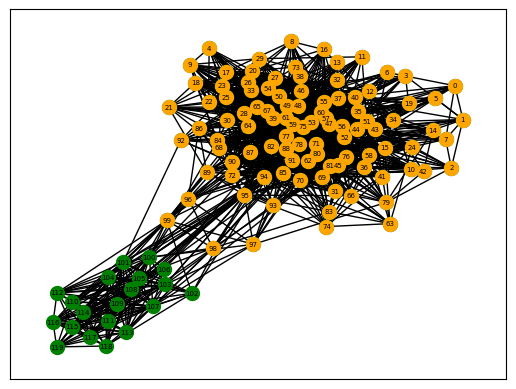

In [ ]:
# print(cutSet)
pos = networkx.spring_layout(reLabelS)

networkx.draw_networkx_edges(reLabelS, pos)
networkx.draw_networkx_nodes(reLabelS, pos, nodelist=reLabelS.nodes, node_color="green",node_size=100)
networkx.draw_networkx_nodes(reLabelS, pos, nodelist=cutSet, node_color="orange",node_size=100)
networkx.draw_networkx_labels(reLabelS, pos,font_size=5)

In [ ]:
def symmetricDifference(lst1, lst2):
  lst3 = [i for i in lst1 if i not in lst2]
  lst4 = [i for i in lst2 if i not in lst1]
  return len(lst3)+len(lst4)

discrepancyResult = {}
iterationNumber = 100
lamb2 = []
lamb3 = []
lamb4 = []
lamb5 = []
cutsetSize = []
gap = []

import random
import math

for multiplier in range(1,50):
  print(multiplier)
  for iteration in range(1):
    thershold = multiplier * 0.005

    ModifiedS = networkx.Graph()
    ModifiedS.add_nodes_from(S.nodes)
    for i in S.nodes:
      for j in S.nodes:
        if i != j:
          p = random.random()
          if p < thershold and (i,j) not in S.edges:
            ModifiedS.add_edge(i,j)
          if p >= thershold and (i,j) in S.edges:
            ModifiedS.add_edge(i,j)


    #reLabel[oldIndex] = newIndex
    modifiedM = networkx.laplacian_matrix(ModifiedS)
    modifiedM = modifiedM.asfptype()
    u, V = scipy.sparse.linalg.eigs(modifiedM,5,which='SM')
    if iteration==0:
      lamb2.append(u[1])
      lamb3.append(u[2])
      lamb4.append(u[3])
      lamb5.append(u[4])
      maxDegree = 0
      for node in ModifiedS:
        degree = ModifiedS.degree(node)
        if degree > maxDegree:
          maxDegree = degree
      gap.append(u[1] * math.sqrt(float(maxDegree)) / math.pow(u[2],1.5) )

    modifiedEigVec = V[:,1]
    dictionary = {}
    modifiedReLabel = {}
    for i in range(eigVec.size):
      dictionary[i] = float(eigVec[i])
    sortedDict = sorted(dictionary.items(), key=lambda item: item[1])
    for i in range(eigVec.size):
      modifiedReLabel[sortedDict[i][0]] = i

    reLabelModifiedS = networkx.relabel_nodes(ModifiedS, modifiedReLabel)
    #networkx.draw(reLabelModifiedS,with_labels = True)

    minNormalizedCS = 1.0
    modifiedCutSet = []
    for i in range(1,S.number_of_nodes() - 1):
      cs = networkx.cut_size(reLabelModifiedS,range(i))
      normalizedCS = float(cs) /i/(S.number_of_nodes()-i)
      if normalizedCS < minNormalizedCS:
        minNormalizedCS = normalizedCS
        modifiedCutSet = range(i)

    cutsetSize.append(minNormalizedCS)

    T = []
    TBar = []

    for i in range(S.number_of_nodes()):
      if reLabel[i] in cutSet:
        T.append(i)
      else:
        TBar.append(i)

    P = []
    PBar = []
    for i in range(S.number_of_nodes()):
      if modifiedReLabel[i] in modifiedCutSet:
        P.append(i)
      else:
        PBar.append(i)

    discrepancy = min(symmetricDifference(T,P) + symmetricDifference(TBar,PBar),
                   symmetricDifference(T,PBar) + symmetricDifference(TBar,P))

    if iteration == 0:
      discrepancyResult[thershold] = discrepancy
    else:
      discrepancyResult[thershold] = max(discrepancy, discrepancyResult[thershold])
  #print(thershold,accuracyResult[thershold])

1
2


<ipython-input-55-14da2135ee17>:49: ComplexWarning: Casting complex values to real discards the imaginary part
  gap.append(u[1] * math.sqrt(float(maxDegree)) / math.pow(u[2],1.5) )
<ipython-input-55-14da2135ee17>:55: ComplexWarning: Casting complex values to real discards the imaginary part
  dictionary[i] = float(eigVec[i])


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
discrepancyResult

{0.005: 0,
 0.01: 2,
 0.015: 0,
 0.02: 4,
 0.025: 0,
 0.03: 2,
 0.035: 0,
 0.04: 0,
 0.045: 0,
 0.05: 0,
 0.055: 0,
 0.06: 8,
 0.065: 0,
 0.07: 0,
 0.075: 4,
 0.08: 0,
 0.085: 8,
 0.09: 0,
 0.095: 0,
 0.1: 0,
 0.105: 4,
 0.11: 0,
 0.115: 8,
 0.12: 6,
 0.125: 0,
 0.13: 2,
 0.135: 4,
 0.14: 8,
 0.145: 8,
 0.15: 8,
 0.155: 4,
 0.16: 0,
 0.165: 0,
 0.17: 6,
 0.17500000000000002: 42,
 0.18: 2,
 0.185: 0,
 0.19: 4,
 0.195: 0,
 0.2: 0,
 0.20500000000000002: 4,
 0.21: 8,
 0.215: 4,
 0.22: 2,
 0.225: 0,
 0.23: 6,
 0.23500000000000001: 8,
 0.24: 42,
 0.245: 4}

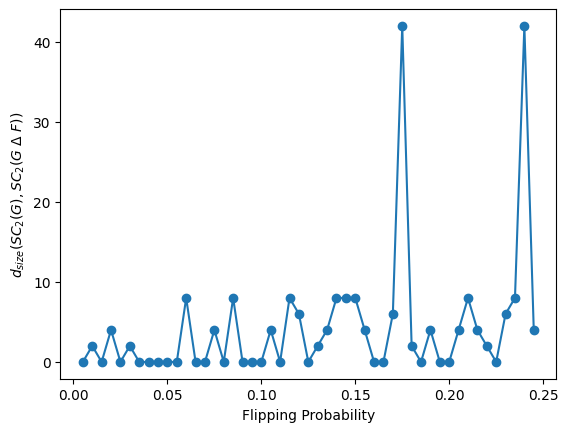

In [ ]:
for i in discrepancyResult:
  discrepancyResult[i] = float(discrepancyResult[i])

import matplotlib.pylab as plt

lists = sorted(discrepancyResult.items())
x, y = zip(*lists)

plt.xlabel('Flipping Probability')
plt.ylabel('$d_{size}(SC_2(G), SC_2(G\ \Delta\ F))$')

plt.plot(x, y, 'o-')
#plt.ylim(-1,10)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


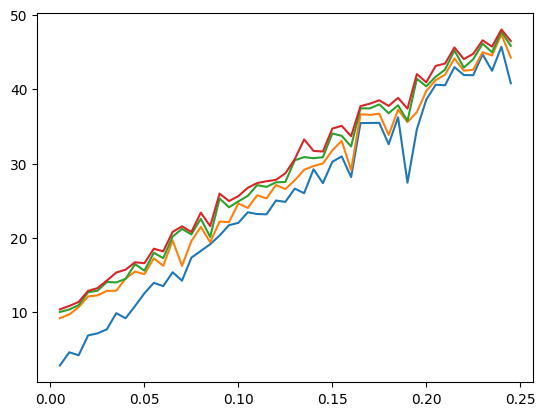

In [ ]:
plt.plot(x, lamb2)
plt.plot(x, lamb3)
plt.plot(x, lamb4)
plt.plot(x, lamb5)
plt.show()

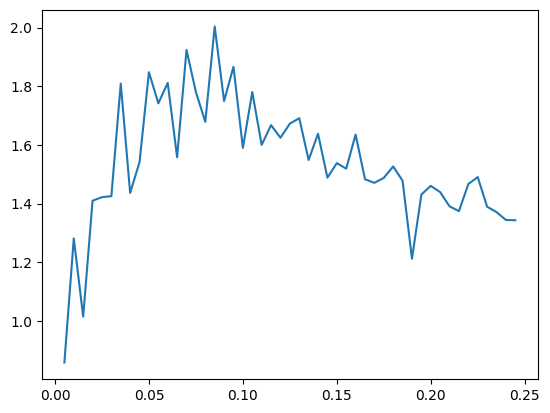

In [ ]:
plt.plot(x, gap)
plt.show()

In [ ]:
TBar,PBar

([4,
  5,
  12,
  28,
  32,
  33,
  37,
  42,
  57,
  67,
  80,
  84,
  85,
  99,
  102,
  104,
  105,
  111,
  115,
  116],
 [4,
  5,
  12,
  28,
  32,
  33,
  37,
  41,
  42,
  57,
  67,
  80,
  81,
  84,
  85,
  99,
  102,
  104,
  105,
  111,
  115,
  116])

In [ ]:
import networkx
import scipy.sparse.linalg

norm = []
for n in range(5,200):
  randomGraph = networkx.erdos_renyi_graph(n, 0.1)
  M = networkx.laplacian_matrix(randomGraph)
  M = M.asfptype()
  u, V = scipy.sparse.linalg.eigs(M,1,which='LR')
  norm.append(u[0])

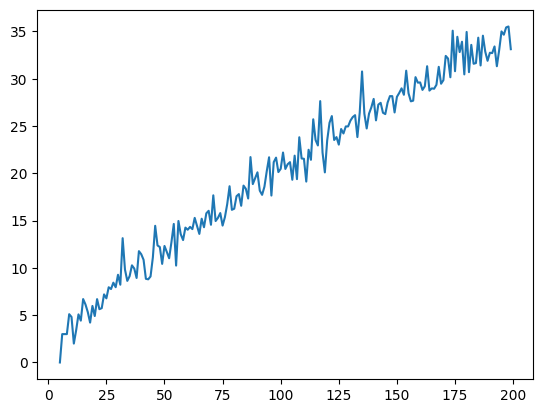

In [ ]:
import matplotlib.pylab as plt
plt.plot(range(5,200),norm)
plt.show()